In [1]:
"imports"

import csv 
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold,train_test_split, LeaveOneOut, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt 


"load data set"

dataset = pd.read_csv("C:/Users/nibha/Desktop/syria.csv") 
X = dataset.drop('status', axis=1) # seperate features 
y = dataset['status'] #seperate label

"convert categorical classes"

deathdate=dataset['deathdate'] 

age=dataset['age'] 
age=age.astype('category')
age=age.cat.codes
gender=dataset['gender'] 
gender=gender.astype('category')
gender=gender.cat.codes
province=dataset['province'] 
province=province.astype('category')
province=province.cat.codes
deathcause=dataset['deathcause']
deathcause=deathcause.astype('category')
deathcause=deathcause.cat.codes

X_features = pd.concat([age,gender,province,deathcause,deathdate], axis=1) #combine categorical and non categorial features 
X_features=np.asarray(X_features)

y = y.astype('category') 

y_target = y.cat.codes 
y_target=np.asarray(y_target) #class0-civilian


'method for contingeny and other values'

def con(t_value,samples,target_pred_prob,y_true):
    target_pred=[]
    for j in range(samples):
      
        threshold=target_pred_prob[j]
        if (threshold<= t_value):
            target_pred.insert(j,1)
        else:
            target_pred.insert(j,0)
        
    tn, fp, fn, tp = confusion_matrix(y_true,target_pred).ravel() 
    
    sens= tp/(tp+fn) #True positive rate
    spec=tn/(fp+tn)
    fpr=100-(spec) #100-specificity
    acc=(tp+tn)/(tp+tn+fp+fn) 
    F1= (2*sens*spec)/(sens+spec) 
    
    return([tn,fp,fn,tp,sens,spec,fpr,acc,F1,target_pred])

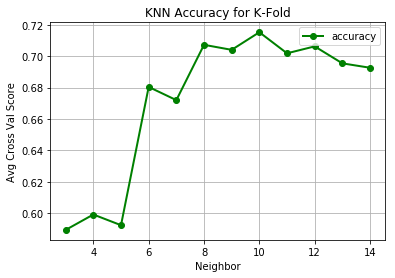

'create tree after getting best depth'

In [2]:
"k fold"

"get epoch like curve"

kf = KFold(n_splits=5) 

def k_model_epoch(n):
    target_pred=[]
    KNN = KNeighborsClassifier(n_neighbors=n) 
    
    for train_index, test_index in kf.split(X_features):
    
        KNN.fit(X_features[train_index], y_target[train_index])
        kftarget_pred_real = KNN.predict(X_features[test_index])
   
    scores=cross_val_score(KNN, X_features, y_target)
    avg_score=scores.mean()
    
    return (avg_score)


for i in range(1,12):
   
    k_model3= np.asarray([k_model_epoch(3)])
    k_model4= np.asarray([k_model_epoch(4)])
    k_model5= np.asarray([k_model_epoch(5)])
    k_model6= np.asarray([k_model_epoch(6)])
    k_model7= np.asarray([k_model_epoch(7)])
    k_model8= np.asarray([k_model_epoch(8)])    
    k_model9= np.asarray([k_model_epoch(9)])
    k_model10= np.asarray([k_model_epoch(10)])
    k_model11= np.asarray([k_model_epoch(11)])
    k_model12= np.asarray([k_model_epoch(12)])
    k_model13= np.asarray([k_model_epoch(13)])
    k_model14= np.asarray([k_model_epoch(14)])
    
n= [3,4,5,6,7,8,9,10,11,12,13,14]

k_avg_score=([k_model3,k_model4,k_model5,k_model6,k_model7,k_model8,k_model9,k_model10
            ,k_model11,k_model12,k_model13,k_model14])


fig=plt.figure()
ax = fig.add_subplot(111) 
ax.plot(n,k_avg_score,marker="o",c='green', linewidth=2, label='accuracy')
ax.set(title='KNN Accuracy for K-Fold', ylabel='Avg Cross Val Score',xlabel='Neighbor')
ax.legend(loc='best') 
plt.grid()
plt.show()

"create tree after getting best depth"

# KNN1 = KNeighborsClassifier(n_neighbors=10) 


# for train_index, test_index in kf.split(X_features):
    
#     KNN1.fit(X_features[train_index], y_target[train_index])
#     kftarget_pred_real = KNN1.predict(X_features[test_index])
    
    

# kftarget_pred_prob = KNN1.predict_proba(X_features)[:,0]

# samples=len(X_features)
# kf_thresh0=con(0,samples,kftarget_pred_prob,y_target)
# kf_thresh1=con(0.25,samples,kftarget_pred_prob,y_target)
# kf_thresh2=con(0.5,samples,kftarget_pred_prob,y_target)
# kf_thresh3=con(0.75,samples,kftarget_pred_prob,y_target)
# kf_thresh4=con(1,samples,kftarget_pred_prob,y_target)

# "roc curve"

# x_k_fpr=[kf_thresh0[6],kf_thresh1[6],kf_thresh2[6],kf_thresh3[6],kf_thresh4[6]] #fpr or 100-specificty
# print(x_k_fpr)
# y_k_tpr=[kf_thresh0[4],kf_thresh1[4],kf_thresh2[4],kf_thresh3[4],kf_thresh4[4]] #sensitivity
# print(y_k_tpr)
# k_auc=roc_auc_score(y_target,kftarget_pred_prob)
# print(k_auc)

# plt.title('ROC Curve for KNN K Fold')
# plt.plot(x_k_fpr,y_k_tpr, color='aqua',lw=2, label='(AUC = %0.2f)' % k_auc)
# plt.legend(loc = 'lower right')
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# print(kf_thresh0[0],kf_thresh0[1],kf_thresh0[2],kf_thresh0[3],kf_thresh0[4],
#       kf_thresh0[5],kf_thresh0[6],kf_thresh0[7])
# print(kf_thresh1[0],kf_thresh1[1],kf_thresh1[2],kf_thresh1[3],kf_thresh1[4]
#       ,kf_thresh1[5],kf_thresh1[6],kf_thresh1[7])
# print(kf_thresh2[0],kf_thresh2[1],kf_thresh2[2],kf_thresh2[3],kf_thresh2[4]
#        ,kf_thresh2[5],kf_thresh2[6],kf_thresh2[7])
# print(kf_thresh3[0],kf_thresh3[1],kf_thresh3[2],kf_thresh3[3],kf_thresh3[4]
#        ,kf_thresh3[5],kf_thresh3[6],kf_thresh3[7])
# print(kf_thresh4[0],kf_thresh4[1],kf_thresh4[2],kf_thresh4[3],kf_thresh4[4]
#        ,kf_thresh4[5],kf_thresh4[6],kf_thresh4[7])
# 3766 1 1196 34 0.0276422764228 0.999734536767 0.760456273764 0.0537970841076
# 3675 92 931 299 0.243089430894 0.975577382533 0.7952771663 0.389199981653
# 3426 341 587 643 0.522764227642 0.90947703743 0.814288573144 0.663913367985
# 2986 781 355 875 0.711382113821 0.79267321476 0.772663598159 0.74983085578
# 0 3767 0 1230 1.0 0.0 0.246147688613 0.0


In [ ]:
# "Leave one out"

loo = LeaveOneOut()
loo.get_n_splits(X_features)

"epoch curve"

def l_model_epoch(n):
    target_pred=[]
    KNN = KNeighborsClassifier(n_neighbors=n) 
    
    for train_index, test_index in loo.split(X_features):
    
        KNN.fit(X_features[train_index], y_target[train_index])
        lootarget_pred_real = KNN.predict(X_features[test_index])
   
    scores=cross_val_score(KNN, X_features, y_target)
    avg_score=scores.mean()
    
    return (avg_score)
l_model5= np.asarray([l_model_epoch(5)])

for i in range(1,12):
   
    l_model3= np.asarray([l_model_epoch(3)])
    l_model4= np.asarray([l_model_epoch(4)])
    l_model5= np.asarray([l_model_epoch(5)])
    l_model6= np.asarray([l_model_epoch(6)])
    l_model7= np.asarray([l_model_epoch(7)])
    l_model8= np.asarray([l_model_epoch(8)])    
    l_model9= np.asarray([l_model_epoch(9)])
    l_model10= np.asarray([l_model_epoch(10)])
    l_model11= np.asarray([l_model_epoch(11)])
    l_model12= np.asarray([l_model_epoch(12)])
    l_model13= np.asarray([l_model_epoch(13)])
    l_model14= np.asarray([l_model_epoch(14)])


n= [3,4,5,6,7,8,9,10,11,12,13,14]

l_avg_score=([l_model3,l_model4,l_model5,l_model6,l_model7,l_model8,l_model9,l_model10
             ,l_model11,l_model12,l_model13,l_model14])


fig=plt.figure()
ax = fig.add_subplot(111) 
ax.plot(n,l_avg_score,marker="o",c='blue', linewidth=2, label='accuracy')
ax.set(title='KNN Accuracy for LOO', ylabel='Avg Cross Val Score',xlabel='Neighbor')
ax.legend(loc='best') 
plt.grid()
plt.show()

"create tree using loo"

KNN2 = KNeighborsClassifier(n_neighbors=10) 

for train_index, test_index in loo.split(X_features):
    
    KNN2.fit(X_features[train_index], y_target[train_index])
    lootarget_pred_real = KNN2.predict(X_features[test_index])

lootarget_pred_prob = KNN2.predict_proba(X_features)[:,0]

samples=len(X_features)
loo_thresh0=con(0,samples,lootarget_pred_prob,y_target)
loo_thresh1=con(0.25,samples,lootarget_pred_prob,y_target)
loo_thresh2=con(0.5,samples,lootarget_pred_prob,y_target)
loo_thresh3=con(0.75,samples,lootarget_pred_prob,y_target)
loo_thresh4=con(1,samples,lootarget_pred_prob,y_target)

"ROC CURVE"

x_l_fpr=[loo_thresh0[6],loo_thresh1[6],loo_thresh2[6],loo_thresh3[6],loo_thresh4[6]] #fpr or 100-specificty
print(x_l_fpr)
y_l_tpr=[loo_thresh0[4],loo_thresh1[4],loo_thresh2[4],loo_thresh3[4],loo_thresh4[4]] #sensitivity
print(y_l_tpr)
l_auc=roc_auc_score(y_target,lootarget_pred_prob)
print(l_auc)

plt.title('ROC Curve for KNN LOO')
plt.plot(x_l_fpr,y_l_tpr, color='deeppink',lw=2, label='(AUC = %0.2f)' % l_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# print(loo_thresh0[0],loo_thresh0[1],loo_thresh0[2],loo_thresh0[3],loo_thresh0[4],
#       loo_thresh0[5],loo_thresh0[6],loo_thresh0[7])
# # output >3767 0 1227 3 0.00243902439024 1.0 0.754452671603 0.00486618004866#tn,fp,fn,tp,sens,spec,acc,F1,
# print(loo_thresh1[0],loo_thresh1[1],loo_thresh1[2],loo_thresh1[3],loo_thresh1[4]
#       ,loo_thresh1[5],loo_thresh1[6],loo_thresh1[7])
# # output>3718 49 1034 196 0.159349593496 0.986992301566 0.783269961977 0.274397756403
# print(loo_thresh2[0],loo_thresh2[1],loo_thresh2[2],loo_thresh2[3],loo_thresh2[4]
#        ,loo_thresh2[5],loo_thresh2[6],loo_thresh2[7])
# # output>3332 431 423 797 0.656097560976 0.884523493496 0.828296978187 0.753376315381
# print(loo_thresh3[0],loo_thresh3[1],loo_thresh3[2],loo_thresh3[3],loo_thresh3[4]
#        ,loo_thresh3[5],loo_thresh3[6],loo_thresh3[7])
# # output>3054 715 241 985 0.80406504065 0.810724714627 0.809085451271 0.807381144811
# print(loo_thresh4[0],loo_thresh4[1],loo_thresh4[2],loo_thresh4[3],loo_thresh4[4]
#        ,loo_thresh4[5],loo_thresh4[6],loo_thresh4[7])
# 3760 7 1147 83 0.0674796747967 0.998141757367 0.769061436862 0.126413150403
# 3683 84 873 357 0.290243902439 0.977701088399 0.808485091055 0.447608975731
# 3281 486 394 836 0.679674796748 0.870984868596 0.823894336602 0.763528550802
# 2852 915 198 1032 0.839024390244 0.757101141492 0.777266359816 0.795960356454
# 0 3767 0 1230 1.0 0.0 0.246147688613 0.0



In [ ]:
"3 tier scheme "
"epochh like curve"

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_features, y_target, test_size= 0.2,random_state=2)

#split train+validation set into train set and validation set 
X_train, X_valid, y_train, y_valid =train_test_split(X_trainval, y_trainval, test_size= 0.2,random_state=2)

def t_model_epoch(n):
    target_pred=[]
    KNN = KNeighborsClassifier(n_neighbors=n) 
    KNN.fit(X_train, y_train) # train on train+validation set
    KNN.fit(X_trainval, y_trainval) #train on training set
    train_acc=KNN.score(X_trainval, y_trainval)
    test_acc=KNN.score(X_test,y_test)       
    return ([train_acc,test_acc])


for i in range(1,12):
   
    t_model3= np.asarray([t_model_epoch(3)])
    t_model4= np.asarray([t_model_epoch(4)])
    t_model5= np.asarray([t_model_epoch(5)])
    t_model6= np.asarray([t_model_epoch(6)])
    t_model7= np.asarray([t_model_epoch(7)])
    t_model8= np.asarray([t_model_epoch(8)])    
    t_model9= np.asarray([t_model_epoch(9)])
    t_model10= np.asarray([t_model_epoch(10)])
    t_model11= np.asarray([t_model_epoch(11)])
    t_model12= np.asarray([t_model_epoch(12)])
    t_model13= np.asarray([t_model_epoch(13)])
    t_model14= np.asarray([t_model_epoch(14)])
    
# x_depth= [3,4,5,6,7,8,9,10,11,12]

y_train_acc=([t_model3[0,0],t_model4[0,0],t_model5[0,0],t_model6[0,0],t_model7[0,0],t_model8[0,0]
            ,t_model9[0,0],t_model10[0,0],t_model11[0,0],t_model12[0,0],t_model13[0,0],t_model14[0,0],])
y_test_acc=([t_model3[0,1],t_model4[0,1],t_model5[0,1],t_model6[0,1],t_model7[0,1],t_model8[0,1]
            ,t_model9[0,1],t_model10[0,1],t_model11[0,1],t_model12[0,1],t_model13[0,1],t_model14[0,1]])

fig=plt.figure()
ax = fig.add_subplot(111) 
ax.plot(n,y_train_acc,marker="o",c='green', linewidth=2, label='training accuracy')
ax.plot(n,y_test_acc, marker="o",c='blue', linewidth=2,label='testing accuracy')
ax.set(title='KNN Accuracy for Tier', ylabel='Accuracy',xlabel='Depth')
ax.legend(loc='best') 
plt.grid()
plt.show()

"create tree for tier"
KNN3 = KNeighborsClassifier(n_neighbors=8) 

KNN3.fit(X_train, y_train) # train on train+validation set
KNN3.fit(X_trainval, y_trainval) #train on training set


tiertarget_pred_real=KNN3.predict(X_test)
tiertarget_pred_prob = KNN3.predict_proba(X_test)[:,0]

tsamples=len(X_test)
tier_thresh0=con(0,tsamples,tiertarget_pred_prob,y_test)
tier_thresh1=con(0.25,tsamples,tiertarget_pred_prob,y_test)
tier_thresh2=con(0.5,tsamples,tiertarget_pred_prob,y_test)
tier_thresh3=con(0.75,tsamples,tiertarget_pred_prob,y_test)
tier_thresh4=con(1,tsamples,tiertarget_pred_prob,y_test)

"ROC CURVE"

x_t_fpr=[tier_thresh0[6],tier_thresh1[6],tier_thresh2[6],tier_thresh3[6],tier_thresh4[6]] #fpr or 100-specificty
print(x_t_fpr)
y_t_tpr=[tier_thresh0[4],tier_thresh1[4],tier_thresh2[4],tier_thresh3[4],tier_thresh4[4]] #sensitivity
print(y_t_tpr)
t_auc=roc_auc_score(y_test,tiertarget_pred_prob)
print(t_auc)

plt.title('ROC Curve for KNN Tier Scheme')
plt.plot(x_t_fpr,y_t_tpr, color='cornflowerblue',lw=2, label='(AUC = %0.2f)' % t_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# print(tier_thresh0[0],tier_thresh0[1],tier_thresh0[2],tier_thresh0[3],tier_thresh0[4],
#       tier_thresh0[5],tier_thresh0[6],tier_thresh0[7])#tn,fp,fn,tp,sens,spec,acc,F1,
# print(tier_thresh1[0],tier_thresh1[1],tier_thresh1[2],tier_thresh1[3],tier_thresh1[4],
#       tier_thresh1[5],tier_thresh1[6],tier_thresh1[7])
# print(tier_thresh2[0],tier_thresh2[1],tier_thresh2[2],tier_thresh2[3],tier_thresh2[4]
#        ,tier_thresh2[5],tier_thresh2[6],tier_thresh2[7])
# print(tier_thresh3[0],tier_thresh3[1],tier_thresh3[2],tier_thresh3[3],tier_thresh3[4]
#        ,tier_thresh3[5],tier_thresh3[6],tier_thresh3[7])
# print(tier_thresh4[0],tier_thresh4[1],tier_thresh4[2],tier_thresh4[3],tier_thresh4[4]
#        ,tier_thresh4[5],tier_thresh4[6],tier_thresh4[7])
# output >751 7 222 20 0.0826446280992 0.990765171504 0.771 0.15256320403
# 730 28 171 71 0.293388429752 0.963060686016 0.801 0.449760931629
# 650 108 86 156 0.644628099174 0.857519788918 0.806 0.735987922249
# 519 239 37 205 0.847107438017 0.684696569921 0.724 0.757292126354
# 0 758 0 242 1.0 0.0 0.242 0.0


In [ ]:
"bar graph for k fold"

groups1 ={'TP':[kf_thresh0[3],kf_thresh1[3],kf_thresh2[3],kf_thresh3[3],kf_thresh4[3]],
          'TN':[kf_thresh0[0],kf_thresh1[0],kf_thresh2[0],kf_thresh3[0],kf_thresh4[0]],
          'FP':[kf_thresh0[1],kf_thresh1[1],kf_thresh2[1],kf_thresh3[1],kf_thresh4[1]],
           'FN':[kf_thresh0[2],kf_thresh1[2],kf_thresh2[2],kf_thresh3[2],kf_thresh4[2]]}
                                           
# Convert data to pandas DataFrame.
df1=pd.DataFrame(groups1,columns= ['TP', 'TN', 'FP', 'FN']).T

ax1 = df1.plot(kind='bar', title='Threshold Effect on Contingency for KNN using K-Fold')
ax1.legend(['T=0','T=0.25','T=0.5','T=0.75','T=1']);

"bar graph for loo"

groups2 ={'TP':[loo_thresh0[3],loo_thresh1[3],loo_thresh2[3],loo_thresh3[3],loo_thresh4[3]],
          'TN':[loo_thresh0[0],loo_thresh1[0],loo_thresh2[0],loo_thresh3[0],loo_thresh4[0]],
          'FP':[loo_thresh0[1],loo_thresh1[1],loo_thresh2[1],loo_thresh3[1],loo_thresh4[1]],
           'FN':[loo_thresh0[2],loo_thresh1[2],loo_thresh2[2],loo_thresh3[2],loo_thresh4[2]]}
                                           
# Convert data to pandas DataFrame.
df2=pd.DataFrame(groups2,columns= ['TP', 'TN', 'FP', 'FN']).T

# Plot.
# hi.plot.bar()

ax2 = df2.plot(kind='bar', title='Threshold Effect on Contingency for KNN using Leave One Out')
ax2.legend(['T=0','T=0.25','T=0.5','T=0.75','T=1']);

"bar graph for tier"

groups3 ={'TP':[tier_thresh0[3],tier_thresh1[3],tier_thresh2[3],tier_thresh3[3],tier_thresh4[3]],
          'TN':[tier_thresh0[0],tier_thresh1[0],tier_thresh2[0],tier_thresh3[0],tier_thresh4[0]],
          'FP':[tier_thresh0[1],tier_thresh1[1],tier_thresh2[1],tier_thresh3[1],tier_thresh4[1]],
           'FN':[tier_thresh0[2],tier_thresh1[2],tier_thresh2[2],tier_thresh3[2],tier_thresh4[2]]}
                                           
# Convert data to pandas DataFrame.
df3=pd.DataFrame(groups3,columns= ['TP', 'TN', 'FP', 'FN']).T

ax3 = df3.plot(kind='bar', title='Threshold Effect on Contingency for KNN using Tier')
ax3.legend(['T=0','T=0.25','T=0.5','T=0.75','T=1']);
